In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
from scipy.optimize import curve_fit

In [2]:
# Data

# Ganancia (en us) acelerando el producto de matrices N x N x N para tamaños 100 x 100, (150 x 150), (200 x 200), 250 x 250, (350 x 350) y 500 x 500
producto_sin_con_100_250_500_100 = np.array([36 / 26664, 103 / 123000, 176 / 276000, 214 / 417000, 476 / 1344000, 800 / 3333000])

# Consumo de hardware (en LUTs y FF) acelerando el acelerando el producto de matrices N x N x N para tamaños 100 x 100, (150 x 150), (200 x 200), 250 x 250, (350 x 350) y 500 x 500
producto_sin_con_lut_100_250_500_100 = np.array([20721 / 377, 51627 / 403,103134 / 418])
producto_sin_con_ff_100_250_500_100 = np.array([10413 / 463, 20556 / 496, 36544 / 528])

# Aumento en consumo de hardware (en LUT, FF y BRAM)
sunsal_sin_con_lut_100_250_500_100 = np.array([139568 / 27669, 304245 / 22969, 591805 / 28326])
sunsal_sin_con_ff_100_250_500_100 = np.array([191982 / 39168, 276741 / 31895, 406022 / 39212])
sunsal_sin_con_bram_100_250_500_100 = np.array([208 / 240, 234 / 266, 234 / 266])

# Reducción en latencia (en ms) maxima para iteraciones 10, 100, 500 y 1000 con matrices de tamaño 100 x 100
compute_SUNSAL_sin_con_100_100_10_100_500_1000 = np.array([647 / 1232, 706 / 6084,  967 / 27649, 1293 / 54605])
# Reducción en latencia (en ms) maxima para iteraciones 10, 100, 500 y 1000 con matrices de tamaño 250 x 250
compute_SUNSAL_sin_con_250_250_10_100_500_1000 = np.array([ 9546 / 18705, 9906 / 94020, 11508 / 428753, 13511 / 847169])
# Reducción en latencia (en ms) maxima para iteraciones 10, 100, 500 y 1000 con matrices de tamaño 500 x 500
compute_SUNSAL_sin_con_500_500_10_100_500_1000 = np.array([ 74851 / 148150, 76284 / 749372 , 82654 / 3400000, 90617 / 6800000])

[0.00135115 0.00115716 0.00103761 0.00095097 0.00088297 0.00082699
 0.00077942 0.00073805 0.00070146 0.00066866 0.00063892 0.00061174
 0.0005867  0.00056349 0.00054186 0.00052161 0.00050258 0.00048462
 0.00046762 0.00045149 0.00043614 0.00042149 0.0004075  0.00039409
 0.00038122 0.00036886 0.00035696 0.00034549 0.00033442 0.00032372
 0.00031338 0.00030335 0.00029364 0.00028421 0.00027506 0.00026616
 0.0002575  0.00024908 0.00024087 0.00023287]


C:\Users\RQui4\AppData\Local\Temp\ipykernel_14664\2511984564.py:2: RuntimeWarning: invalid value encountered in log
  return a  + b * np.log(c * x + d)


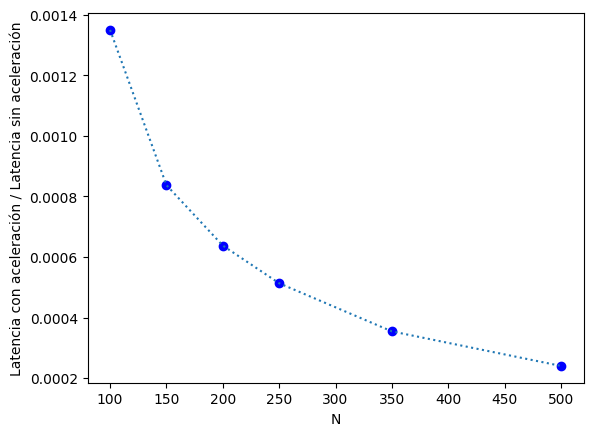

In [3]:
def objective(x, a, b, c, d):
    return a  + b * np.log(c * x + d)

popt, _ = curve_fit(objective, [100,150,200,250,350,500],producto_sin_con_100_250_500_100)
a, b, c, d = popt

x_line = np.arange(100, 500, 10)
y_line = objective(x_line, a, b, c, d)
print(y_line)

plt.plot([100,150,200,250,350,500],producto_sin_con_100_250_500_100, linestyle=':' )
plt.scatter([100,150,200,250,350,500],producto_sin_con_100_250_500_100, color='blue')
#pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.title('Mejora en la latencia del producto de matrices N x N para N = 100, 150, 200, 250, 350, 500')
plt.xlabel('N')
plt.ylabel('Latencia con aceleración / Latencia sin aceleración')
plt.show()

[ 55.46506381  60.25427164  65.04347946  69.83268729  74.62189512
  79.41110294  84.20031077  88.9895186   93.77872642  98.56793425
 103.35714208 108.1463499  112.93555773 117.72476556 122.51397338
 127.30318121 132.09238903 136.88159686 141.67080469 146.46001251
 151.24922034 156.03842817 160.82763599 165.61684382 170.40605165
 175.19525947 179.9844673  184.77367513 189.56288295 194.35209078
 199.1412986  203.93050643 208.71971426 213.50892208 218.29812991
 223.08733774 227.87654556 232.66575339 237.45496122 242.24416904]
[23.07500626 24.23720501 25.39940377 26.56160253 27.72380128 28.88600004
 30.0481988  31.21039755 32.37259631 33.53479506 34.69699382 35.85919258
 37.02139133 38.18359009 39.34578884 40.5079876  41.67018636 42.83238511
 43.99458387 45.15678262 46.31898138 47.48118014 48.64337889 49.80557765
 50.96777641 52.12997516 53.29217392 54.45437267 55.61657143 56.77877019
 57.94096894 59.1031677  60.26536645 61.42756521 62.58976397 63.75196272
 64.91416148 66.07636023 67.23855

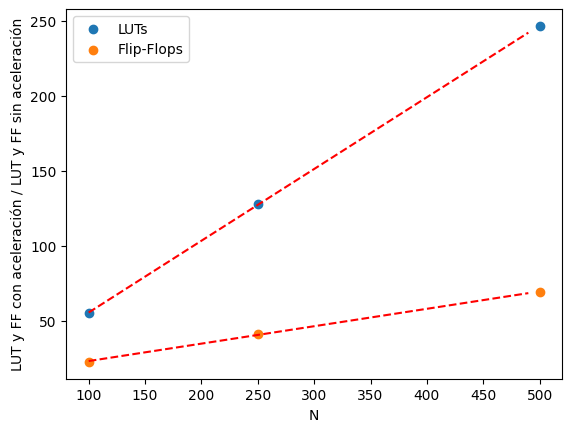

In [11]:
def objective(x, a, b):
    return a  + b * x

popt, _ = curve_fit(objective, [100,250,500],producto_sin_con_lut_100_250_500_100)
a, b = popt

x_line = np.arange(100, 500, 10)
y_line = objective(x_line, a, b)
print(y_line)

pyplot.plot(x_line, y_line, '--', color='red')
popt, _ = curve_fit(objective, [100,250,500],producto_sin_con_ff_100_250_500_100)
a, b = popt

x_line = np.arange(100, 500, 10)
y_line = objective(x_line, a, b)
print(y_line)

pyplot.plot(x_line, y_line, '--', color='red')
plt.scatter([100,250,500],producto_sin_con_lut_100_250_500_100, label = 'LUTs')
plt.scatter([100,250,500],producto_sin_con_ff_100_250_500_100, label = 'Flip-Flops')
# plt.title('Aumento del consumo de LUT y FF del producto de matrices N x N para N = 100, 250, 500')
plt.xlabel('N')
plt.ylabel('LUT y FF con aceleración / LUT y FF sin aceleración')
plt.legend()
plt.show()

C:\Users\RQui4\AppData\Local\Temp\ipykernel_14664\392089173.py:2: RuntimeWarning: invalid value encountered in log
  return a  + b * np.log(c * x)


[ 4.80992298  5.74399409  6.59673421  7.38117908  8.10746159  8.78361442
  9.41611316 10.0102544  10.57042566 11.10030221 11.60299337 12.08115303
 12.53706449 12.97270638 13.38980461 13.78987358 14.17424947 14.5441171
 14.90053198 15.24443846 15.57668482 15.89803587 16.20918356 16.51075593
 16.80332479 17.08741219 17.36349605 17.63201501 17.89337261 18.14794092
 18.39606377 18.63805949 18.87422342 19.10483004 19.33013488 19.55037626
 19.76577678 19.97654466 20.182875   20.3849508 ]
[ 5.0928118   5.41938518  5.71752331  5.99178381  6.24570937  6.48210841
  6.70324494  6.91097079  7.10681992  7.29207731  7.46783004  7.63500598
  7.79440342  7.94671414  8.09254155  8.23241514  8.36680205  8.49611653
  8.62072761  8.74096546  8.85712665  8.96947859  9.07826318  9.18370003
  9.28598903  9.38531271  9.48183816  9.57571875  9.66709555  9.75609866
  9.84284828  9.92745572 10.01002422 10.09064975 10.16942166 10.24642326
 10.32173238 10.39542182 10.46755979 10.53821028]


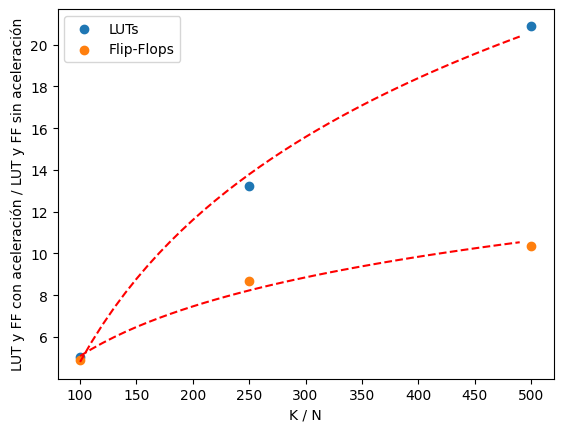

In [9]:
def objective(x, a, b, c):
    return a  + b * np.log(c * x)

popt, _ = curve_fit(objective, [100,250,500],sunsal_sin_con_lut_100_250_500_100)
a, b, c = popt

x_line = np.arange(100, 500, 10)
y_line = objective(x_line, a, b, c)
print(y_line)

pyplot.plot(x_line, y_line, '--', color='red')

popt, _ = curve_fit(objective, [100,250,500],sunsal_sin_con_ff_100_250_500_100)
a, b, c = popt

x_line = np.arange(100, 500, 10)
y_line = objective(x_line, a, b, c)
print(y_line)

pyplot.plot(x_line, y_line, '--', color='red')

plt.scatter([100,250,500],sunsal_sin_con_lut_100_250_500_100, label = 'LUTs')
plt.scatter([100,250,500],sunsal_sin_con_ff_100_250_500_100, label = 'Flip-Flops')
#plt.title('Aumento del consumo de LUT y FF de SUnSAL para N = 100, 250, 500')
plt.xlabel('K / N')
plt.ylabel('LUT y FF con aceleración / LUT y FF sin aceleración')
plt.legend()
plt.show()

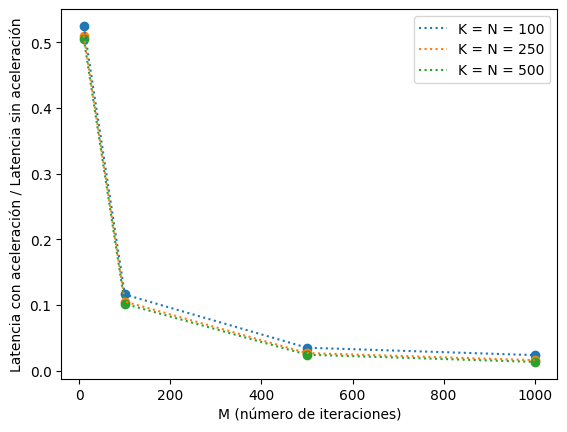

In [6]:
plt.scatter([10,100,500, 1000],compute_SUNSAL_sin_con_100_100_10_100_500_1000)
plt.scatter([10,100,500, 1000],compute_SUNSAL_sin_con_250_250_10_100_500_1000)
plt.scatter([10,100,500, 1000],compute_SUNSAL_sin_con_500_500_10_100_500_1000)
plt.plot([10,100,500, 1000],compute_SUNSAL_sin_con_100_100_10_100_500_1000, linestyle=':', label = 'K = N = 100')
plt.plot([10,100,500, 1000],compute_SUNSAL_sin_con_250_250_10_100_500_1000, linestyle=':', label = 'K = N = 250')
plt.plot([10,100,500, 1000],compute_SUNSAL_sin_con_500_500_10_100_500_1000, linestyle=':', label = 'K = N = 500')
# plt.title('Reducción de latencia para iters = 10, 100, 500, 1000 con matrices K x N con K = N = 100, 250, 500')
plt.xlabel('M (número de iteraciones)')
plt.legend()
plt.ylabel('Latencia con aceleración / Latencia sin aceleración')
plt.show()